In [1]:
import os, sys
module_rootdir = '../..'
dataset_rootdir = '../../..'
label_rootdir = module_rootdir
weight_rootdir = module_rootdir
sys.path.append(module_rootdir)

from modules.first_stage.set_parameters_for_inference import set_param_for_inference
from modules.plot.plot_dataanalysis import plot_intervals_roc2
from modules.evaluation.score_tuning import ROC_for_score_tuning

In [2]:
weights_file = 'model_weights/1705990924432/anchor_free_detector.pt'

param_dict = set_param_for_inference(
    dataset_type = 'kitti',
    module_rootdir = module_rootdir,
    dataset_rootdir = dataset_rootdir,
    label_rootdir = label_rootdir,
    batch_size = 1,
    trained_weights_file = os.path.join(weight_rootdir, weights_file))

device = param_dict['device']
dataset_param = param_dict['dataset_param']
dataset_train = param_dict['dataset_train']
dataset_val = param_dict['dataset_val'] 
detector = param_dict['detector']

GPU is available. Good to go!
printing model config parameters
----------------------------------------------------------------------------------------------------
backbone                        : efficientnet_b4
num_backbone_nodes              : 4
num_extra_blocks                : 1
num_levels                      : 5
extra_blocks_feat_dim           : 512
num_fpn_blocks                  : 2
fpn_feat_dim                    : 128
prediction head stem_channels   : [128, 128, 128, 128]
activation                      : swish
image dimension BDD (H, W, D)   : (360, 640, 3)
image dimension KITTI (H, W, D) : (263, 873, 3)
num_classes                     : 2
DEVICE                          : cuda
****************************************************************************************************
 
Loading JSON file .. please wait
Sequence: 0000
Sequence: 0001
Sequence: 0002
Sequence: 0003
Sequence: 0004
Sequence: 0005
Sequence: 0006
Sequence: 0008
Sequence: 0009
Sequence: 0011
Sequence: 0012

In [3]:
dataset = dataset_train
gt_iou_thresh = 0.1
nms_thresh = 0.35
image_start_idx = 0
num_images = 200 #6000

generating detection rate & FP_per_image for score:  0.05
generating detection rate & FP_per_image for score:  0.1
generating detection rate & FP_per_image for score:  0.2
generating detection rate & FP_per_image for score:  0.3
generating detection rate & FP_per_image for score:  0.4
generating detection rate & FP_per_image for score:  0.5
generating detection rate & FP_per_image for score:  0.6
generating detection rate & FP_per_image for score:  0.7
generating detection rate & FP_per_image for score:  0.8
generating detection rate & FP_per_image for score:  0.9
generating detection rate & FP_per_image for score:  0.99


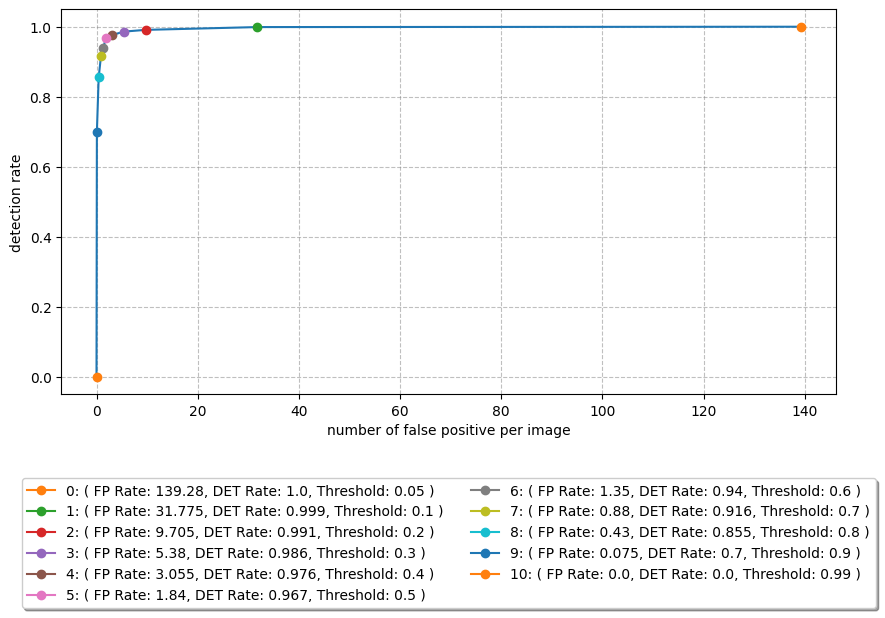

In [4]:
selected_clssid = 0
SCORE_THRESH_class0, \
DETECTION_RATE_LIST_class0, \
FP_RATE_PER_IMAGE_LIST_class0 \
    = ROC_for_score_tuning(
        num_images = num_images, 
        image_start_idx = image_start_idx, 
        selected_clssid = selected_clssid,
        detector = detector, 
        dataset = dataset, 
        dataset_param = dataset_param,
        iou_thresh = gt_iou_thresh, 
        nms_thresh = nms_thresh, 
        device = device)

plot_intervals_roc2(SCORE_THRESH_class0, FP_RATE_PER_IMAGE_LIST_class0, DETECTION_RATE_LIST_class0, figsize=(10, 5))

generating detection rate & FP_per_image for score:  0.05
generating detection rate & FP_per_image for score:  0.1
generating detection rate & FP_per_image for score:  0.2
generating detection rate & FP_per_image for score:  0.3
generating detection rate & FP_per_image for score:  0.4
generating detection rate & FP_per_image for score:  0.5
generating detection rate & FP_per_image for score:  0.6
generating detection rate & FP_per_image for score:  0.7
generating detection rate & FP_per_image for score:  0.8
generating detection rate & FP_per_image for score:  0.9
generating detection rate & FP_per_image for score:  0.99


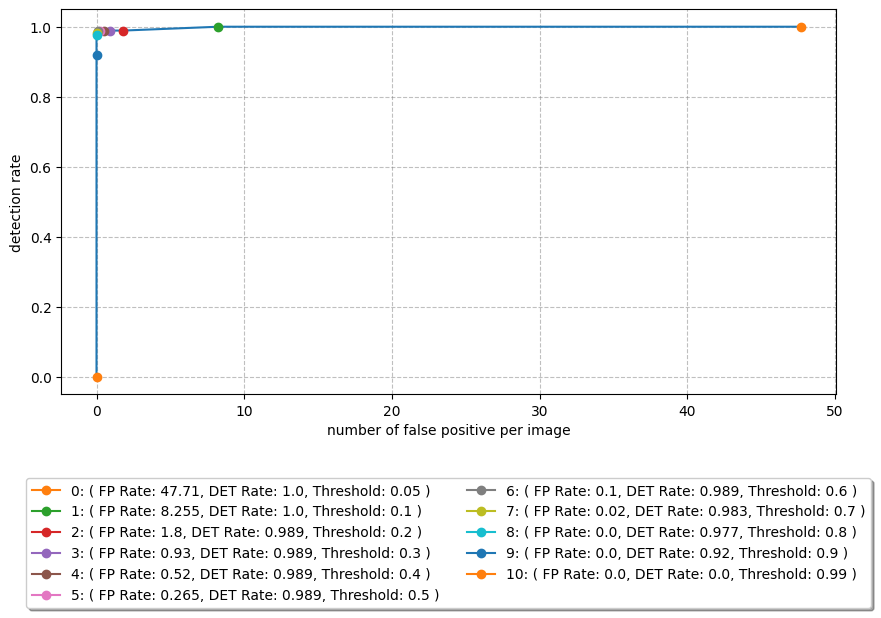

In [5]:
selected_clssid = 1
SCORE_THRESH_class1, \
DETECTION_RATE_LIST_class1, \
FP_RATE_PER_IMAGE_LIST_class1 \
    = ROC_for_score_tuning(
        num_images = num_images, 
        image_start_idx = image_start_idx, 
        selected_clssid = selected_clssid,
        detector = detector, 
        dataset = dataset, 
        dataset_param = dataset_param,
        iou_thresh = gt_iou_thresh, 
        nms_thresh = nms_thresh, 
        device = device)

plot_intervals_roc2(SCORE_THRESH_class1, FP_RATE_PER_IMAGE_LIST_class1, DETECTION_RATE_LIST_class1, figsize=(10, 5))

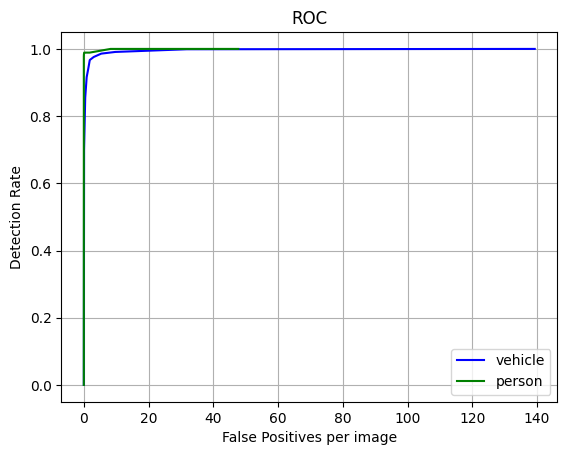

In [6]:
import matplotlib.pyplot as plt
from modules.dataset_utils.bdd_dataset_utils.constants import _IDX_TO_OBJ_CLASS_

plt.plot(FP_RATE_PER_IMAGE_LIST_class0, DETECTION_RATE_LIST_class0, color='blue',  label=_IDX_TO_OBJ_CLASS_[0])
plt.plot(FP_RATE_PER_IMAGE_LIST_class1, DETECTION_RATE_LIST_class1, color='green', label=_IDX_TO_OBJ_CLASS_[1])
plt.xlabel('False Positives per image')
plt.ylabel('Detection Rate')
plt.title(f'ROC')
plt.grid(True)
plt.legend()
plt.show()

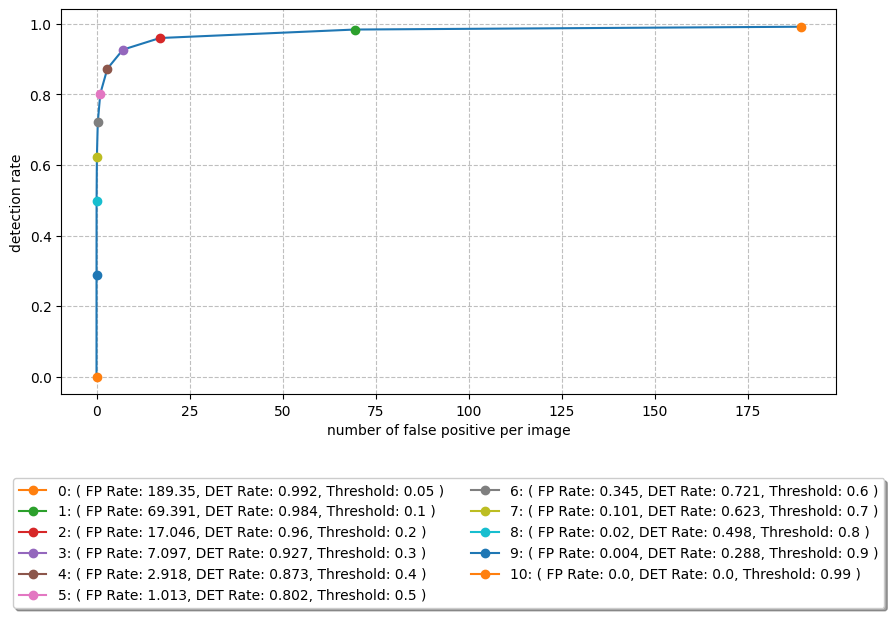

In [4]:
plot_intervals_roc2(SCORE_THRESH_class0, FP_RATE_PER_IMAGE_LIST_class0, DETECTION_RATE_LIST_class0, figsize=(10, 5))

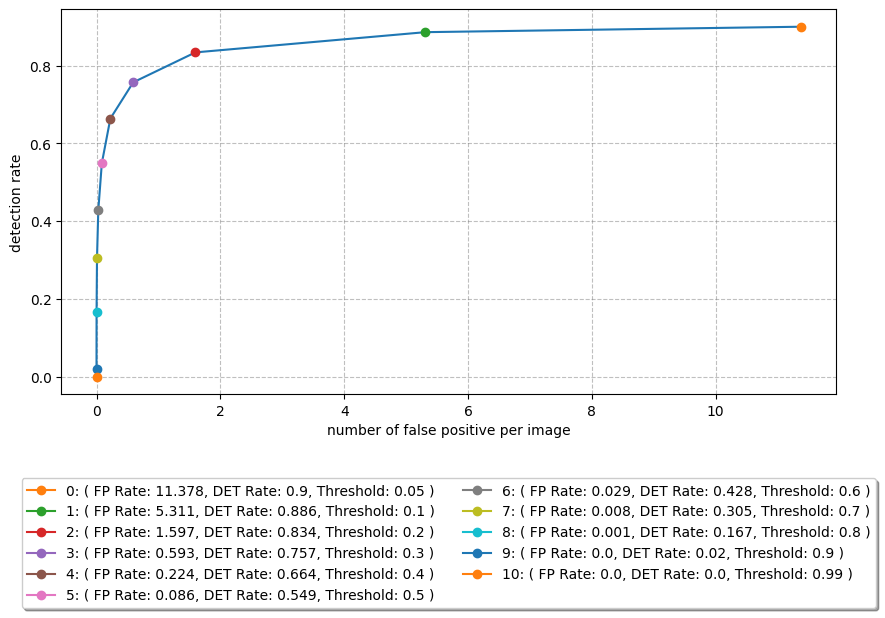

In [6]:
plot_intervals_roc2(SCORE_THRESH_class1, FP_RATE_PER_IMAGE_LIST_class1, DETECTION_RATE_LIST_class1, figsize=(10, 5))

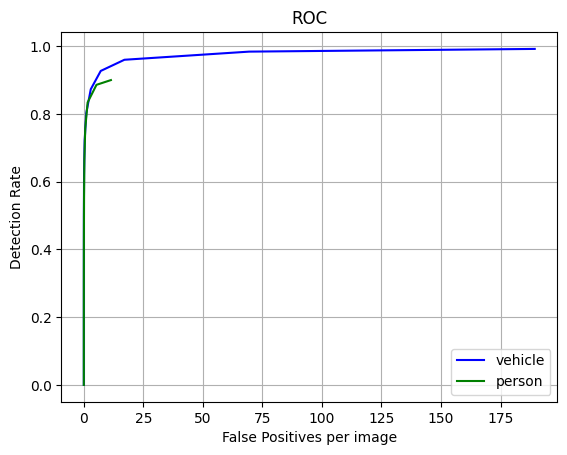

In [7]:
import matplotlib.pyplot as plt
from modules.dataset_utils.bdd_dataset_utils.constants import _IDX_TO_OBJ_CLASS_

plt.plot(FP_RATE_PER_IMAGE_LIST_class0, DETECTION_RATE_LIST_class0, color='blue',  label=_IDX_TO_OBJ_CLASS_[0])
plt.plot(FP_RATE_PER_IMAGE_LIST_class1, DETECTION_RATE_LIST_class1, color='green', label=_IDX_TO_OBJ_CLASS_[1])
plt.xlabel('False Positives per image')
plt.ylabel('Detection Rate')
plt.title(f'ROC')
plt.grid(True)
plt.legend()
plt.show()

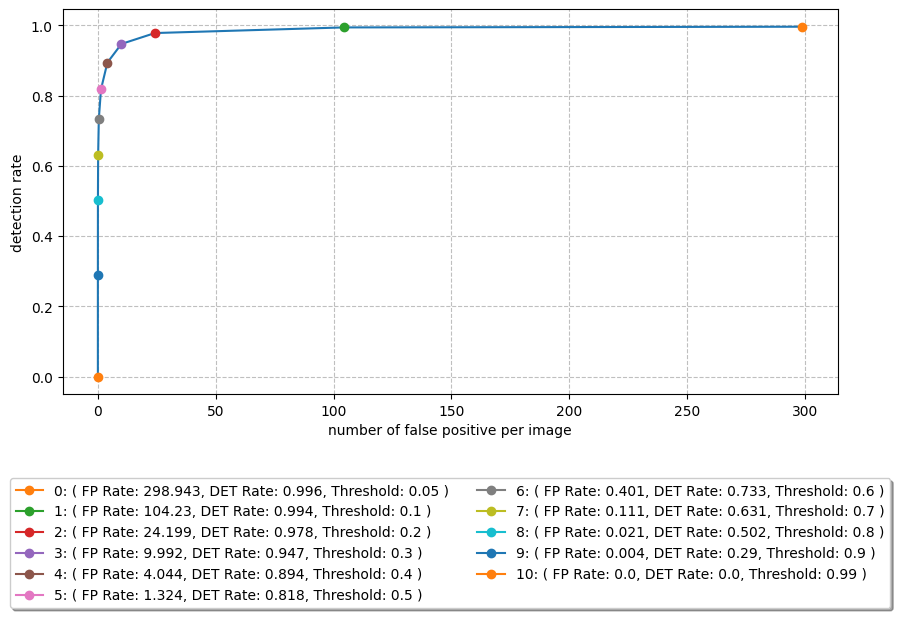

In [4]:
# iou 0.0
plot_intervals_roc2(SCORE_THRESH_class0, FP_RATE_PER_IMAGE_LIST_class0, DETECTION_RATE_LIST_class0, figsize=(10, 5))

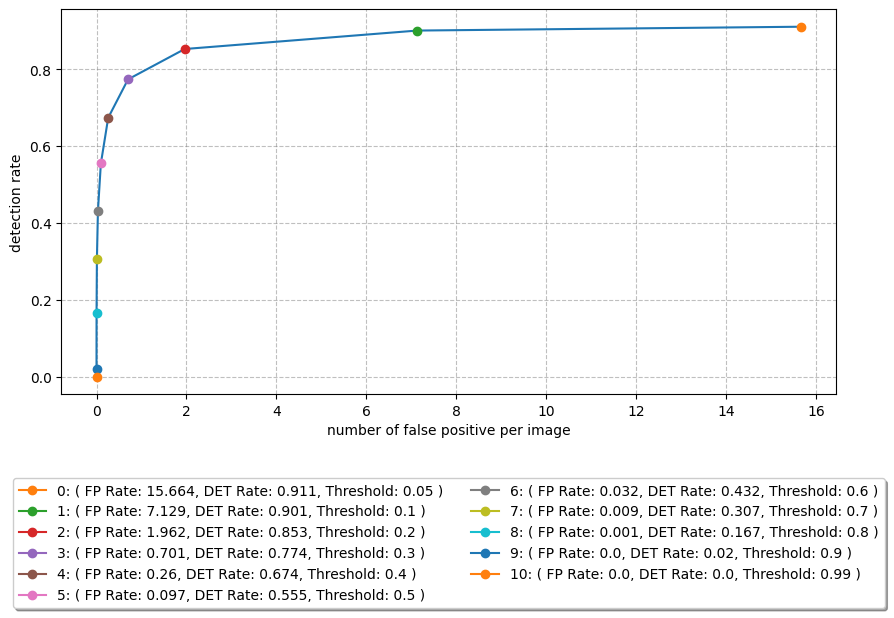

In [6]:
plot_intervals_roc2(SCORE_THRESH_class1, FP_RATE_PER_IMAGE_LIST_class1, DETECTION_RATE_LIST_class1, figsize=(10, 5))

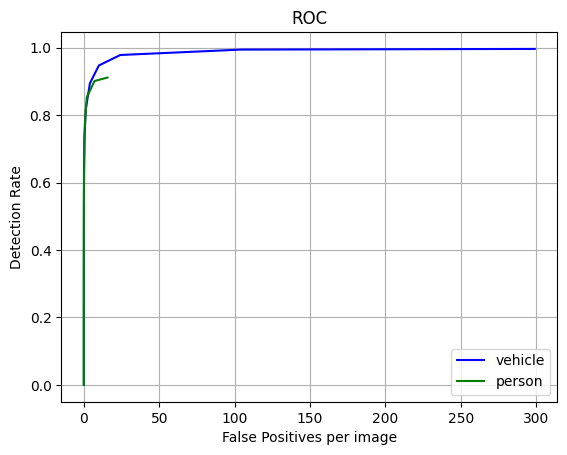